# Introduction

An inverted pendulum is a system where a mass is rigidly attached to a linearly moving platform. The platform can thus move in a 2-D plane so as to balance the attached mass at fixed angle to the plane of motion. The system is shown in Figure 1

![Inverted Pendulum](./Figures/InvertedPendulum.png)

In this work, we will look at the properties of the system and check to see if the system can be made controllable by either using Kalman decomposition or pole placement

# Literature Review

The course textbook [1] describes the mathematics in deriving the state space equations that represent the system. 
The equations for the system are given by:
$$
\begin{bmatrix}
    \dot{x_1}(t)\\
    \dot{x_2}(t)\\
    \dot{x_3}(t)\\
    \dot{x_4}(t)\\
\end{bmatrix}=\begin{bmatrix}
    0 & 1 & 0 & 0 \\
    0 & 0 & \frac{-mg}{M} & 0 \\
    0 & 0 & 0 & 1 \\
    0 & 0 & \frac{(M+m)g}{Ml} & 0
    \end{bmatrix}\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    \end{bmatrix} + \begin{bmatrix}
    0 \\ \frac{1}{M} \\ 0 \\ \frac{-1}{Ml}
    \end{bmatrix} u(t) 
    \\
    y(t) = \begin{bmatrix}
    1 & 0 & 0 & 0
    \end{bmatrix}\mathbf{x}(t)
$$
where $ x_1(t) = y(t), x_2(t)=\dot{y}(t),x_3(t) =\theta(t), \mathrm{and\ } x_4(t)=\dot{\theta}(t)$. As the goal of the system is to maintain the attached mass in an upright postion, these equations are only valid for $\theta \rightarrow 0$. Furthermore, the output is only set to the distance, $y$, the cart needs to move from the starting point.

A more realistic model is given in [2]. This model accounts for friction between the cart wheels and the ground.

$$
\begin{bmatrix}
    \dot{x_1}(t)\\
    \dot{x_2}(t)\\
    \dot{x_3}(t)\\
    \dot{x_4}(t)\\
\end{bmatrix} = \begin{bmatrix}
    0 & 1 & 0 & 0 \\
    0 & \frac{-(I+ml^2)\mu}{I(M+m)+Mml^2} & \frac{m^2gl^2}{I(M+m)+Mml^2} &  0\\
    0 &      0      &        0    &       1\\
    0 &  \frac{-(ml\mu)}{I(M+m)+Mml^2}  &     \frac{mgl(M+m)}{I(M+m)+Mml^2} &  0 
\end{bmatrix}\begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    x_4 \\
    \end{bmatrix}+ \begin{bmatrix}
    0 \\ \frac{I+ml^2}{I(M+m)+Mml^2} \\ 0 \\ \frac{ml}{I(M+m)+Mml^2}
    \end{bmatrix} u(t) \\
    y(t) = \begin{bmatrix}
    1 & 0 & 0 & 0\\
    0 & 0 & 1 & 0
    \end{bmatrix}\mathbf{x}(t)
$$
where, $I$ is the moment of inertia of the pendulum and $\mu$ is the coefficient of friction between the ground and the cart's wheels.

For analysis, the first model is chosen for its simplicity

# Code and system

## Part I
***Set the Parameters to ensure the system is controllable and observable. Prove the system is controllable and observable for the chosen paparmeters.***

In [1]:
from control import *
import numpy as np
#%matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from IPython.display import display, Markdown
from matplotlib.ticker import LinearLocator

from control.matlab import *
plt.rcParams['figure.figsize'] = [10, 10]

Set parameters for the inverted pendulum: Let 
$$
    g = 9.8 \mathrm{\ m/s^2} \\
    M = 2 \mathrm{\ kg} \\
    m = 1 \mathrm{\ kg} \\
    l = 0.5 \mathrm{\ m}\\
$$

In [2]:
m = 1 # mass of the pendulum.
M = 2 # mass of the cart.
g = 9.81 # gravity.
l = 0.5 # length of the pendulum.

A = np.array([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]]) #A is a system matrix.
B = np.array([[0],[1/M],[0],[-1/(M*l)]]) #B is an input matrix.
C = np.array([1,0,0,0]) #C is an Output matrix.
D = 0 #D is a Transmission matrix

### Check the Controllabilty:

In [3]:
Co = ctrb(A,B)                          # Get the controlability matrix
rows,columns = np.shape(Co)
R1 = np.linalg.matrix_rank(Co)          # Get the rank of the controllability matrix
if R1 == rows :                         # Check if matrix has full row rank 
    print("System is Controllable.")
    de1 = np.linalg.det(Co)
    print(de1) 
else:
    print("System is not Controllable")

System is Controllable.
96.2361


As can be seen, the system is controllabe since the controlability matrix $\mathcal{C}_o$ has full row rank. Further, the determinant of matrix $\mathcal{C}_o$ is non zero. 

### Check the Observability:

In [4]:
Obs = obsv(A,C)                    # Get the observability matrix
rows,columns = np.shape(Obs)
R2=np.linalg.matrix_rank(Obs)      # Get the rank of the observability matrix
if R2 == rows:                     # Check if matrix has full row rank
    print("System is observable.")
    de2 = np.linalg.det(Obs)
    print(de2) 
else:
    print("System is not Observable")

System is observable.
24.059025000000005


The system is observable as well. The observability matrix $\mathcal{O}$ is also full rank. Further, the determinant of matrix $\mathcal{O}$ is non zero. 

### Regions of Control
The matrix may be controllable and observable for the given values. But to check for values that the system might not be controllable or observable, we can solve for the determinant algebraicly. If the determinant of a matrix is non zero, it can be shown that the rank of the matrix is less than full rank.

In [5]:
M,m,l = sym.symbols('M m l')

A = sym.Matrix([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]]) #A is a system matrix.
B = sym.Matrix([0,1/M,0,-1/(M*l)]) #B is an input matrix.
C = sym.Matrix([1,0,0,0])
C = C.T

Since we're doing this algebraicly, we need to manually make the controllability and observability matrix. and find the determinant

In [6]:
Ctrb = B
Ctrb = Ctrb.col_insert(1,A*B)
Ctrb = Ctrb.col_insert(2,A*A*B)
Ctrb = Ctrb.col_insert(3,A*A*A*B)
Ctrb_det = Ctrb.det()
Ctrb_det

96.2361/(M**4*l**4)

This shows that the system is un-controllable for values of $M \ \mathrm{and}\  l \rightarrow \infty$

<img src="Figures/Controllability.png" alt="drawing" width="1200"/>

In [7]:
Obs = C
Obs = Obs.row_insert(1,C*A)
Obs = Obs.row_insert(2,C*A*A)
Obs = Obs.row_insert(3,C*A*A*A)
Obs_det = Obs.det()
Obs_det

96.2361*m**2/M**2

This shows that the system is un-observable for values of $M \rightarrow \infty$ or $m = 0$

<img src="Figures/Observability.png" alt="drawing" width="1200"/>

## Part II
***Set the parameters to create an "uncontrollable" form and use Kalman Decomposition to obtain the controllable form.***

For this part, the first step was to figure out what values of parameters would make the system uncontrollable. If the rank of the controllability matrix was forced to 
be made less than the full rank, the system would become uncontrollable. The following code calculates the controllability matrix of the given system. 

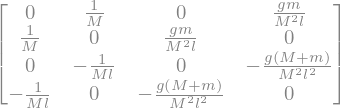

In [8]:
# This is for nice looking latex output
sym.init_printing()

# Defining our system matrices
m, M, l, g = sym.symbols('m M l g')

A = sym.Matrix([[0, 1, 0, 0],
               [0, 0, -m*g/M, 0],
               [0, 0, 0, 1],
               [0, 0, (M+m)*g/(M*l), 0]])

B = sym.Matrix([[0],
               [1/M],
               [0],
               [-1/(M*l)]])

C = sym.Matrix([[1, 0, 0, 0]])

# This function returns True if the parameter num is a float. False, otherwise.
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

# This function returns whether or not a particular matrix is controllable. The matrices must only be symbolic matrices. 
# It also returns the controllability matrix. 
def controllable_sym(A, B, dim=4):
    cols = B
    
    for i in range(1, dim):
        col = sym.Matrix([[(A**i)*B]])
        cols = cols.col_insert(i, col)
    
    if(cols.rank() == dim):
        return True, cols
    else:
        return False, cols
    

controllable, cont_matrix = controllable_sym(A, B)

# displaying the controllability Matrix
cont_matrix

The goal now is to make column 1 equal to column 3. (1 indexed)

We can to by the following 2 rules:

$$ m >>> M $$

$$ M = \frac{g*m}{l} $$

In the following code, we will define the variables according to the above rules and verify that this new system is, in fact, uncontrollable. 

controllable? False


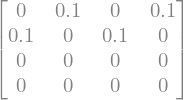

In [9]:
# This function checks to see if a numerical matrix consisting of floats is controllable. 
# It returns the boolean value along with the controllability matrix. 
def controllable(A, B, dim=4):
    cols = B
    
    for i in range(1, dim):
        col = sym.Matrix([[(A**i)*B]])
        cols = cols.col_insert(i, col)
    
    r, c = sym.shape(cols)
    
    for i in range(r*c):
        if(isfloat(cols[i])):
            cols[i] = round(cols[i], 2)
    
    if(cols.rank() == dim):
        return True, cols
    else:
        return False, cols

calc_m = 10000
calc_g = 9.8
calc_l = 9900
calc_M = (calc_g*calc_m)/(calc_l)


new_A = A.evalf(subs={m:calc_m, M:calc_M, l:calc_l , g:calc_g})
new_B = B.evalf(subs={m:calc_m, M:calc_M, l:calc_l , g:calc_g})
new_C = C.evalf(subs={m:calc_m, M:calc_M, l:calc_l , g:calc_g})

new_controllable, new_cont_matrix = controllable(new_A, new_B)

print("controllable?", new_controllable)

# display the new controllability matrix 
new_cont_matrix

In [10]:
print("Rank of the above Controllable Matrix:", new_cont_matrix.rank())

Rank of the above Controllable Matrix: 2


### Kalman Decomposition

Since the rank of this new matrix is 2 (less than 4), the new system is not controllable. We can make it controllable using the method of Kalman Decomposition. 
Let's understand the Kalman Decomposition Process. 

1. We generate a matrix Q using the controllability matrix such that Q is inversible. Since the rank of our controllability matrix was 2, we will use 2 linearly 
   independent columns of the controllability matrix as the first 2 columns of Q. We will then fill in the rest of Q such that Q is invertible. In our code, we will 
   simply find the nullspace of the 2 vectors we get from the controllability matrix. 
   
    $$Q = \begin{bmatrix} 0 & 0.1 & 0 & 0 \\ 0.1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0\\ 0 & 0 & 0 & 1 \end{bmatrix}$$

2. Find P 

    $$ P = Q^{-1} $$

3. Find $ \bar{A} $ , $ \bar{B} $, $ \bar{C} $ with the following formulae:
    
    $$ \bar{A} = PAP^{-1} $$
    $$ \bar{B} = PB $$
    $$ \bar{C} = CP^{-1} $$

4. Finally, we pick the 2x2 top left of $ \bar{A} $ (2x2 because A is a square matrix and the rank of our original controllability matrix was 2) and name it $ A_c $. 
   We pick 2x1 of the $ \bar{B} $ and name it $ B_c $. And we pick 1x2 of the $ \bar{C} $ and name it $ C_c $
   
These new matrices that we found, $ A_c $, $ B_c $, $ C_c $, make up the new representation of the system that is controllable. Now that we've got the theory down, 
let's code it up and see the results. 
   
   $$ \dot{x} = A_c x(t) + B_c u(t) $$
   $$ y = C_c x(t) $$ 

In [11]:
# This function find the nullspace of the passed in matrix and adds the nullspace to the matrix. This new matrix is now invertible. 
def fill_square_with_identity(A):
    row, col = sym.shape(A)
    
    if(row == col):
        return A
    
    else:
        if( col < row ):
            tempA = A
            for i, c in enumerate(A.T.nullspace()):
                A = A.col_insert(tempA.rank()+i, c)
            
            return A
                    
        else:
           print("something went wrong")
           return False
        
    
# This function performs the Kalman Decomposition using the passed in matrices. It returns the controllable matrices, namely Ac, Bc and Cc. 
def kalman_decomposition(A, B, controllability_matrix):
    
    rank = controllability_matrix.rank()
    # assuming that rank is atleast 1
    Q = controllability_matrix.col(0)
    
    for i in range(1, rank):
        Q = Q.col_insert(i, controllability_matrix.col(i))
    
    Q = fill_square_with_identity(Q)
        
    if( not(Q) ):
        return False

    P = Q.inv()
    A_bar = P*A*P.inv()
    B_bar = P*B
    C_bar = C*P.inv()
    
    Ac = sym.Matrix([A_bar[:rank, :rank]])
    Bc = sym.Matrix([B_bar[:rank]]).T
    Cc = sym.Matrix([C_bar[:rank]])
    
    if(not(controllable(Ac, Bc, rank))):
        print("Kalman Decomposition Failed.")
        return False
        
    return Ac, Bc, Cc

Controllable_SS = kalman_decomposition(new_A, new_B, controllable(new_A, new_B)[1])

if((Controllable_SS)):
    Ac = Controllable_SS[0]
    Bc = Controllable_SS[1]
    Cc = Controllable_SS[2]
else:
    print("Kalman Decomposition Failed")

### Results:

The following matrices are the results of the Kalman Decomposition:

Ac:


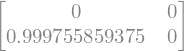

In [12]:
print("Ac:")
Ac

Bc:


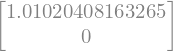

In [13]:
print("Bc:")
Bc

In [14]:
print("Cc:")
Cc

Cc:


### Checking the Results

Finally, we can now check the results by comparing the transfer function generated by our original uncontrollable state space system with the new controllable state
space system. 

In [15]:
print("uncontrollable system:", ss2tf(new_A, new_B, new_C, sym.Matrix([[0]])))
print("controllable system:", ss2tf(Ac, Bc, Cc, sym.Matrix([[0]])))

uncontrollable system: 
     0.101 s^2 - 5.36e-17 s - 0.0001
-----------------------------------------
s^4 - 1.001 s^2 + 3.914e-16 s - 2.441e-17

controllable system: 
0.101
-----
 s^2



### Conclusion for Part II
We can verify that the above transfer functions are the not quite exact, but almost exact. We can confirm that we have found the controllable form out of the
uncontrollable form for the system using the kalman Decomposition. 

## Part III

**Set the parameters to create an “unstable” system. Use “constant 
gain negative state-feedback” to make the system stable.**

We will use the same parameters as we used in the first part to check for stability and generate the needed gains

In [16]:
m = 1     # mass of the pendulum.
M = 2     # mass of the cart.
g = 9.81  # gravity.
l = 0.5   # length of the pendulum.

In [17]:
A = np.array([[0,1,0,0],[0,0,-(m*g)/M,0],[0,0,0,1],[0,0,(M+m)*g/(M*l),0]])
B = np.array([[0],[1/M],[0],[-1/(M*l)]])
C = np.array([[1,0,0,0],[0,0,1,0]])
D = 0

### Pole-Zero Map

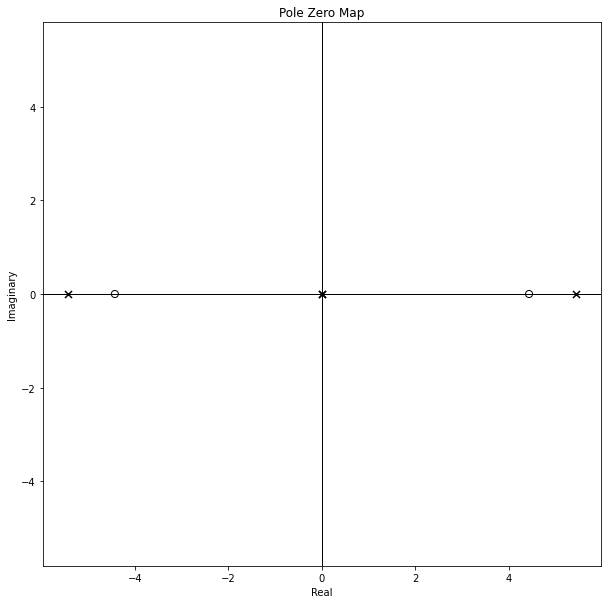

In [18]:
sys_y = ss(A,B,C[0:1],D)
r = pzmap(sys_y,xlim=[-10,10],ylim=[-20,20])

As can be seen, there are poles on the left half plane. Thus the system is unstable. 

### Pole Placement using Matlab

Let us arbritrarily pick 4 poles such that the system can be made stable for some forward gain. Let the chosen poles be at (-5±0.5j) and (-6±1j). These poles are fast enough to get us a settling time of $\lt 0.5$s

In [19]:
poles = [-5+0.5j,-5-0.5j,-6-1j,-6+1j]
k = place(A,B,poles)
print(k)

[[ -95.23445464  -68.60346585 -259.29722732  -56.30173293]]


### Pole Placement using Ackermann's formula

Ackermann's formula can be used to easily place poles. The formula is given by:
$$
    k = [0\ 0\ 0\ ...\ 1]\mathcal{C}_o^{-1}\Delta_{d}(A)
$$

Where, $\Delta_d$ is the characteristic equation obtained from the desired eigen values

In [20]:
# Calculate same gains using Ackermann's formula
det_new = np.identity(4)
for root in poles:
    det_new = np.matmul(det_new,(A-root*np.identity(4)))

k_ack = np.matmul(np.matmul(np.array([0,0,0,1]),np.linalg.inv(Co)),det_new)
k_ack = np.real(k_ack.reshape((1,4)))
print(k_ack)

[[ -95.23445464  -68.60346585 -259.29722732  -56.30173293]]


## Part IV

We can plot the step responses of the the system's outputs, the tilt angle and the $y$ displacement.

### Step response

The state space equations for the new system are given by:
$$
    \dot{x} = (A-Bk)x + Br \\
    y = Cx + Du
$$

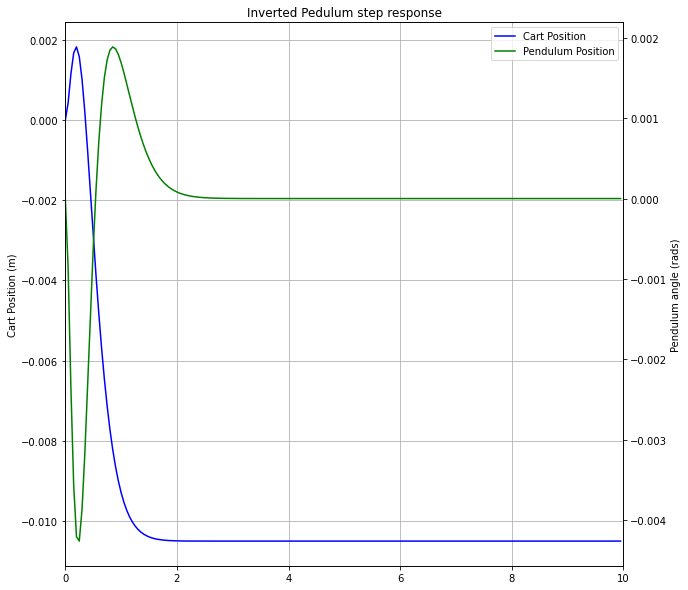

In [21]:
Afb = (A-np.matmul(B,k_ack))         # New A matrix with feedback gains K

sysfb_y = ss(Afb,B,C[0:1],D)         # State space system with new fedback gains K
sysfb_angle = ss(Afb,B,C[1:],D)

T = np.arange(0,10,0.05)            

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

y,T=step(sysfb_y,T)
p = ax1.plot(T,y,'b-')

y,T = step(sysfb_angle,T)
p = ax2.plot(T,y,'g-')

e = ax1.grid()
e = plt.xlim([0,10])
e = ax1.set_ylabel('Cart Position (m)')
e = ax2.set_ylabel('Pendulum angle (rads)')
e = plt.xlabel('Time (s)')
e = plt.title('Inverted Pedulum step response')
e = fig.legend(['Cart Position','Pendulum Position'],loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()

### Pole locations of the desired system

We can have a look at pole location again to make sure that the poles ended up where we wanted them. Now the system is stable for some forward gain K

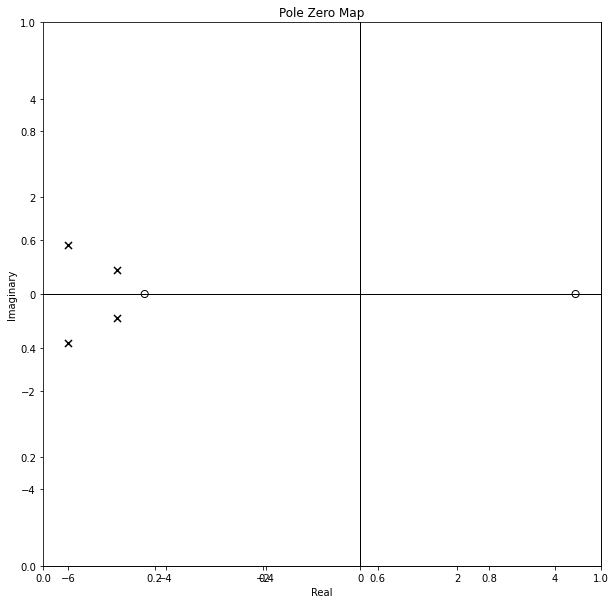

In [22]:
fig = plt.figure()
ax  = plt.axes()
r,k = pzmap(sysfb_y,xlim=[-10,5],ylim=[-10,10],ax=ax)

# Conclusions
The inverted pendulum has been studied extensively in the field of controls. The system is always controllable as long as the values for the parameters are chosen sensibly. For example the mass of the pendulum can't be greater than the mass of the cart itself or physical constants can't be assumed to have values other than are agreed to be accurate by the scientific community. 

Observability of the the system depends on the output equation. If output is chosen to be either the angle of the pendulum from vertical, the rate of change of the angle or the velocity of the cart, the system becomes unobservable. On the other hand if the output is chosen to be the distance the cart has moved, the system is then controllable.


The inverted pendulum system is inherently unstable. The mass at the end of the pendulum will not stay upright on its own accord. This is supposrted by the right half plane pole shown in Fig 2. Thus to balance the mass vertically a feedback system must be used. Feedback gains can be chosen to place the poles on the left half plane so as to achive the requred dynamics. To calculate the feedback gains, the `place` command can be used in Matlab or the Ackermann's formula can also be used. The resulting system is now stable. But in order to use these gais we would need to 


# References

[1] C.-T. Chen, “Mathematical descriptions of Systems,” in Linear System Theory and design, New York, NY: Oxford university press, 2014, pp. 33–35. 

[2] “Inverted pendulum: System modeling,” Control Tutorials for MATLAB and Simulink - Inverted Pendulum: System Modeling. [Online]. Available: https://ctms.engin.umich.edu/CTMS/index.php?example=InvertedPendulum§ion=SystemModeling. [Accessed: 24-Apr-2022]. 